In [1]:
import pandas as pd
import numpy as np
import gmaps as gm
import datetime 
from scipy.stats import zscore
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/melis/Downloads/res.csv", sep=",")
df.head()

attributes.nom_dept attributes.code_station       attributes.nom_station  \
0       HAUTE-GARONNE                 FR50021      Toulouse-Mazades Urbain   
1       HAUTE-GARONNE                 FR50030    Toulouse-Berthelot Urbain   
2       HAUTE-GARONNE                 FR50060  Montauban - Ramierou Urbain   
3     HAUTES-PYRENEES                 FR50052          Tarbes-Dupuy Urbain   
4             AVEYRON                 FR50815       Rodez - Camonil Urbain   

  attributes.nom_com  attributes.date_debut  attributes.date_fin  \
0           TOULOUSE           1.605200e+12         1.605204e+12   
1           TOULOUSE           1.605200e+12         1.605204e+12   
2              MURET           1.605200e+12         1.605204e+12   
3             TARBES           1.605200e+12         1.605204e+12   
4              RODEZ           1.605200e+12         1.605204e+12   

  attributes.nom_poll  attributes.valeur  geometry.x  geometry.y  
0                PM10               19.7    1.438610     43.6236  
1                PM10               20.5    1.444030     43.5873  
2                PM10               41.3    1.375310     44.0129  
3                PM10               15.7    0.062222     43.2303  
4                PM10               14.4    2.570700     44.3570

In [3]:
df["attributes.date_debut"] = [datetime.datetime.fromtimestamp(i /1000) for i in df["attributes.date_debut"]]
df = df.loc[(df['attributes.valeur']>=0) & (df["attributes.nom_station"] == "Montpellier - Prés d Arènes Urbain") & (df["attributes.nom_poll"] == "PM10")]
df.reset_index(drop=True, inplace=True) #Reset index after removing the outliers

In [4]:
df

attributes.nom_dept attributes.code_station  \
0                HERAULT                 FR50200   
1                HERAULT                 FR50200   
2                HERAULT                 FR50200   
3                HERAULT                 FR50200   
4                HERAULT                 FR50200   
...                  ...                     ...   
3257             HERAULT                 FR50200   
3258             HERAULT                 FR50200   
3259             HERAULT                 FR50200   
3260             HERAULT                 FR50200   
3261             HERAULT                 FR50200   

                  attributes.nom_station attributes.nom_com  \
0     Montpellier - Prés d Arènes Urbain        MONTPELLIER   
1     Montpellier - Prés d Arènes Urbain        MONTPELLIER   
2     Montpellier - Prés d Arènes Urbain        MONTPELLIER   
3     Montpellier - Prés d Arènes Urbain        MONTPELLIER   
4     Montpellier - Prés d Arènes Urbain        MONTPELLIER   
...                                  ...                ...   
3257  Montpellier - Prés d Arènes Urbain        MONTPELLIER   
3258  Montpellier - Prés d Arènes Urbain        MONTPELLIER   
3259  Montpellier - Prés d Arènes Urbain        MONTPELLIER   
3260  Montpellier - Prés d Arènes Urbain        MONTPELLIER   
3261  Montpellier - Prés d Arènes Urbain        MONTPELLIER   

     attributes.date_debut  attributes.date_fin attributes.nom_poll  \
0      2020-11-12 18:00:00         1.605204e+12                PM10   
1      2020-11-12 19:00:00         1.605208e+12                PM10   
2      2020-11-12 20:00:00         1.605211e+12                PM10   
3      2020-11-12 21:00:00         1.605215e+12                PM10   
4      2020-11-13 02:00:00         1.605233e+12                PM10   
...                    ...                  ...                 ...   
3257   2021-03-04 02:00:00         1.614823e+12                PM10   
3258   2021-03-04 04:00:00         1.614830e+12                PM10   
3259   2021-03-04 05:00:00         1.614834e+12                PM10   
3260   2021-03-04 06:00:00         1.614838e+12                PM10   
3261   2021-03-04 07:00:00         1.614841e+12                PM10   

      attributes.valeur  geometry.x  geometry.y  
0                  29.5     3.88689     43.5915  
1                  29.2     3.88689     43.5915  
2                  28.4     3.88689     43.5915  
3                  29.4     3.88689     43.5915  
4                  21.7     3.88689     43.5915  
...                 ...         ...         ...  
3257               42.1     3.88689     43.5915  
3258               39.5     3.88689     43.5915  
3259               40.0     3.88689     43.5915  
3260               41.6     3.88689     43.5915  
3261               42.0     3.88689     43.5915  

[3262 rows x 10 columns]

In [5]:
data = pd.DataFrame(list(df["attributes.valeur"]), index = df["attributes.date_debut"], columns = ["attributes.valeur"])
data.index = pd.to_datetime(data.index)
data

attributes.valeur
attributes.date_debut                   
2020-11-12 18:00:00                 29.5
2020-11-12 19:00:00                 29.2
2020-11-12 20:00:00                 28.4
2020-11-12 21:00:00                 29.4
2020-11-13 02:00:00                 21.7
...                                  ...
2021-03-04 02:00:00                 42.1
2021-03-04 04:00:00                 39.5
2021-03-04 05:00:00                 40.0
2021-03-04 06:00:00                 41.6
2021-03-04 07:00:00                 42.0

[3262 rows x 1 columns]

In [6]:
data = data[(np.abs(zscore(data))<3).all(axis=1)] #Remove outliers

<AxesSubplot:xlabel='attributes.date_debut'>

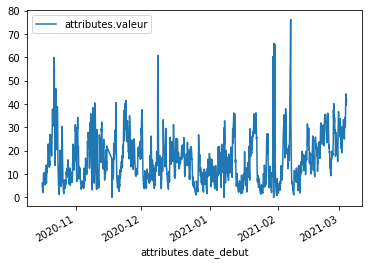

In [7]:
data.plot()

In [8]:
data

attributes.valeur
attributes.date_debut                   
2020-11-12 18:00:00                 29.5
2020-11-12 19:00:00                 29.2
2020-11-12 20:00:00                 28.4
2020-11-12 21:00:00                 29.4
2020-11-13 02:00:00                 21.7
...                                  ...
2021-03-04 02:00:00                 42.1
2021-03-04 04:00:00                 39.5
2021-03-04 05:00:00                 40.0
2021-03-04 06:00:00                 41.6
2021-03-04 07:00:00                 42.0

[3255 rows x 1 columns]

In [9]:
data1 = data.loc['2021-02-17 09:00:00':'2021-03-04 07:00:00']
data1 = data1.sort_index()

In [10]:
data1

attributes.valeur
attributes.date_debut                   
2021-02-17 09:00:00                 15.2
2021-02-17 10:00:00                 15.0
2021-02-17 11:00:00                 15.7
2021-02-17 12:00:00                 17.7
2021-02-17 13:00:00                 16.3
...                                  ...
2021-03-04 03:00:00                 41.4
2021-03-04 04:00:00                 39.5
2021-03-04 05:00:00                 40.0
2021-03-04 06:00:00                 41.6
2021-03-04 07:00:00                 42.0

[359 rows x 1 columns]

In [11]:
z = len(data1)
z

359

In [12]:
x = round(len(data1)*0.8)
x

287

<AxesSubplot:xlabel='attributes.date_debut'>

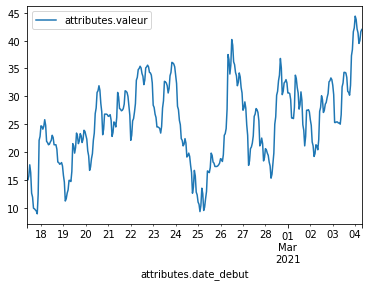

In [13]:
data1.plot()

In [14]:
x = round(len(data1)*0.8)
data1.index[x]

Timestamp('2021-03-01 08:00:00')

In [15]:
datatrain = data1.loc['2021-02-17 09:00:00':'2021-03-01 08:00:00']
datatest = data1.loc['2021-03-01 08:00:00':]

In [16]:
datatrain

attributes.valeur
attributes.date_debut                   
2021-02-17 09:00:00                 15.2
2021-02-17 10:00:00                 15.0
2021-02-17 11:00:00                 15.7
2021-02-17 12:00:00                 17.7
2021-02-17 13:00:00                 16.3
...                                  ...
2021-03-01 04:00:00                 26.1
2021-03-01 05:00:00                 26.1
2021-03-01 06:00:00                 26.0
2021-03-01 07:00:00                 28.0
2021-03-01 08:00:00                 33.8

[288 rows x 1 columns]

In [17]:
datatest

attributes.valeur
attributes.date_debut                   
2021-03-01 08:00:00                 33.8
2021-03-01 09:00:00                 33.2
2021-03-01 10:00:00                 31.6
2021-03-01 11:00:00                 30.6
2021-03-01 12:00:00                 27.7
...                                  ...
2021-03-04 03:00:00                 41.4
2021-03-04 04:00:00                 39.5
2021-03-04 05:00:00                 40.0
2021-03-04 06:00:00                 41.6
2021-03-04 07:00:00                 42.0

[72 rows x 1 columns]

In [18]:
y = len(datatrain)
y

288

In [19]:
z = len(datatest)
z

72

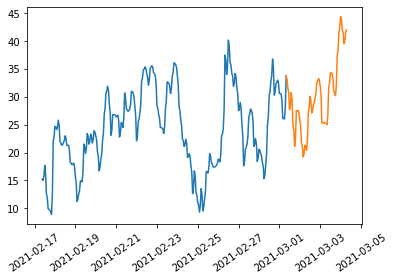

In [20]:
plt.xticks(rotation=35)
plt.plot(datatrain, label='80%')
plt.plot(datatest, label='20%')

In [21]:
# let's check if we need the d
from statsmodels.tsa.stattools import adfuller,acf
from numpy import log
result = adfuller(data1.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.995182
p-value: 0.288690


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


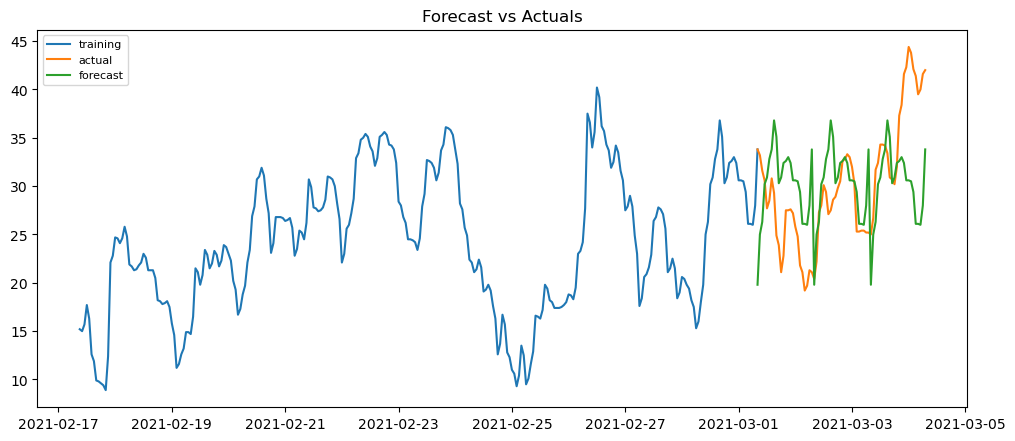

In [31]:
from statsmodels.tsa.arima.model import ARIMA
#ARIMA MODEL
#model = ARIMA(datatrain, order=(0, 1, 0))  
#SARIMA MODEL
model = ARIMA(datatrain, seasonal_order=(0, 1, 0, 24))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(len(datatest))

# Make as pandas series
fc.index = datatest.index


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(datatrain, label='training')
plt.plot(datatest, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
#plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

In [32]:
# Accuracy metrics
from statsmodels.tsa.stattools import adfuller,acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr,
             'minmax':minmax})

forecast_accuracy(fc,datatest.values.reshape([len(datatest),]))

<ipython-input-32-9d07f656f53e>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-32-9d07f656f53e>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.1770175842290593,
 'me': 0.022222222222221946,
 'mae': 5.291666666666666,
 'mpe': 0.038392500867051524,
 'rmse': 6.7985088234275475,
 'acf1': 0.8215197417152272,
 'corr': 0.1529934735503064,
 'minmax': 0.1535549769156379}

In [775]:
datatest

attributes.valeur
attributes.date_debut                   
2021-03-01 08:00:00                 33.8
2021-03-01 09:00:00                 33.2
2021-03-01 10:00:00                 31.6
2021-03-01 11:00:00                 30.6
2021-03-01 12:00:00                 27.7
...                                  ...
2021-03-04 03:00:00                 41.4
2021-03-04 04:00:00                 39.5
2021-03-04 05:00:00                 40.0
2021-03-04 06:00:00                 41.6
2021-03-04 07:00:00                 42.0

[72 rows x 1 columns]

In [776]:
fc

attributes.date_debut
2021-03-01 08:00:00    27.9
2021-03-01 09:00:00    29.0
2021-03-01 10:00:00    27.9
2021-03-01 11:00:00    24.9
2021-03-01 12:00:00    23.0
                       ... 
2021-03-04 03:00:00    26.4
2021-03-04 04:00:00    26.8
2021-03-04 05:00:00    27.8
2021-03-04 06:00:00    27.6
2021-03-04 07:00:00    27.1
Name: predicted_mean, Length: 72, dtype: float64